In [1]:
import pandas as pd
data = pd.read_csv('data_balloons.csv',delimiter=';')
df = pd.DataFrame(data)
df.style.hide_index()

ID,color,size,act,age,inflated
1,YELLOW,SMALL,STRETCH,ADULT,T
2,YELLOW,SMALL,STRETCH,ADULT,T
3,YELLOW,SMALL,STRETCH,ADULT,T
4,YELLOW,SMALL,STRETCH,ADULT,T
5,YELLOW,SMALL,STRETCH,ADULT,T
6,YELLOW,SMALL,STRETCH,ADULT,T
7,YELLOW,SMALL,STRETCH,ADULT,T
8,YELLOW,SMALL,STRETCH,ADULT,T
9,YELLOW,SMALL,STRETCH,ADULT,T
10,YELLOW,SMALL,STRETCH,ADULT,T


In [7]:
def show_cluster(data,k):
    cluster = {}
    for i in range(k):
        cluster['Cluster ' + str(i)] = data[data["Cluster"].isin([i])].iloc[:,0].values
    dframe = pd.DataFrame.from_dict(cluster, orient='index')
    dframe = dframe.transpose()
    dframe = dframe.fillna("")
    return dframe.style.hide_index()

In [8]:
from kmodes.kmodes import KModes

k = 3
df_dummy = pd.get_dummies(df)
data_set = df_dummy.reset_index().values

kmodes_cao = KModes(n_clusters=k, init='Cao', verbose=1)
cluster = kmodes_cao.fit(data_set)
data['Cluster'] = cluster.labels_


show_cluster(data,k)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 404.0


Cluster 0,Cluster 1,Cluster 2
1,41,11
2,42,12
3,43,13
4,44,14
5,45,15
6,46,21
7,47,22
8,48,23
9,49,24
10,50,25


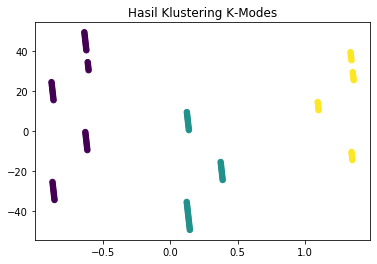

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(2)
# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dummy.iloc[:,0:6])

# Plot based on the two dimensions, and shade by cluster label
plt.title("Hasil Klustering K-Modes")
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["Cluster"], s=30)
plt.show()